In [246]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [247]:
read_data1 = pd.read_csv(r'C:\bootcamp\train(1).csv')
read_data1.shape

(325, 23)

In [248]:
read_data1.head()

,S/N,Gender,Age,Location,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,paid,activities,nursery,higher,internet,famrel,freetime,health,absences,Score
0,1,F,13,U,GT3,A,4,4,2,2,...,no,no,yes,yes,no,4,3,3,4,22
1,2,F,12,U,GT3,T,1,1,1,2,...,no,no,no,yes,yes,5,3,3,2,31
2,3,F,10,U,LE3,T,1,1,1,2,...,no,no,yes,yes,yes,4,3,3,6,37
3,4,F,10,U,GT3,T,4,2,1,3,...,no,yes,yes,yes,yes,3,2,5,0,42
4,5,F,11,U,GT3,T,3,3,1,2,...,no,no,yes,yes,no,4,3,5,0,37


In [249]:
read_data = read_data1.drop('Gender', axis = 1)

In [250]:
read_data.keys()

Index(['S/N', 'Age', 'Location', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid',
       'activities', 'nursery', 'higher', 'internet', 'famrel', 'freetime',
       'health', 'absences', 'Score'],
      dtype='object')

In [251]:
read_file = read_data
# Gender
#read_file['Gender'][read_file['Gender']== 'F'] = 0
#read_file['Gender'][read_file['Gender'] == 'M'] = 1

# setting urban to 0 and rural to 2
read_file['Location'][read_file['Location']== 'U'] = 1
read_file['Location'][read_file['Location']== 'R'] = 0

# setting the famsize 
read_file['famsize'][read_file['famsize'] == 'LE3'] = 0 # less than 3
read_file['famsize'][read_file['famsize'] == 'GT3'] = 1 # greater than 3

# Pstatus
read_file['Pstatus'][read_file['Pstatus'] == 'T'] = 1 # living together
read_file['Pstatus'][read_file['Pstatus'] == 'A'] = 0 # living Apart

# paid
read_file['paid'][read_file['paid'] == 'yes'] = 1 # yes
read_file['paid'][read_file['paid'] == 'no'] = 0 # no

# activities
read_file['activities'][read_file['activities'] == 'yes'] = 1 # yes
read_file['activities'][read_file['activities'] == 'no'] = 0 # no

# nursery
read_file['nursery'][read_file['nursery'] == 'yes'] = 1 # yes
read_file['nursery'][read_file['nursery'] == 'no'] = 0 # no

# higher
read_file['higher'][read_file['higher'] == 'yes'] = 1 # yes
read_file['higher'][read_file['higher'] == 'no'] = 0 # no

# internet
read_file['internet'][read_file['internet'] == 'yes'] = 1 # yes
read_file['internet'][read_file['internet'] == 'no'] = 0 # no

# schoolsup
read_file['schoolsup'][read_file['schoolsup'] == 'yes'] = 1 # yes
read_file['schoolsup'][read_file['schoolsup'] == 'no'] = 0 # no

# famsup
read_file['famsup'][read_file['famsup'] == 'yes'] = 1 # yes
read_file['famsup'][read_file['famsup'] == 'no'] = 0 # no


#def replace(x):
#    file_new[x][file_new[x] == 'yes'] = 0 # yes
#    file_new[x][file_new[x] == 'no'] = 1 # no
#replace('paid')
#print (file_new['paid'])

read_file.head()

C:\Users\ACER\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\ACER\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\ACER\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\ACER\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCop

,S/N,Age,Location,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,...,paid,activities,nursery,higher,internet,famrel,freetime,health,absences,Score
0,1,13,1,1,0,4,4,2,2,0,...,0,0,1,1,0,4,3,3,4,22
1,2,12,1,1,1,1,1,1,2,0,...,0,0,0,1,1,5,3,3,2,31
2,3,10,1,0,1,1,1,1,2,0,...,0,0,1,1,1,4,3,3,6,37
3,4,10,1,1,1,4,2,1,3,0,...,0,1,1,1,1,3,2,5,0,42
4,5,11,1,1,1,3,3,1,2,0,...,0,0,1,1,0,4,3,5,0,37


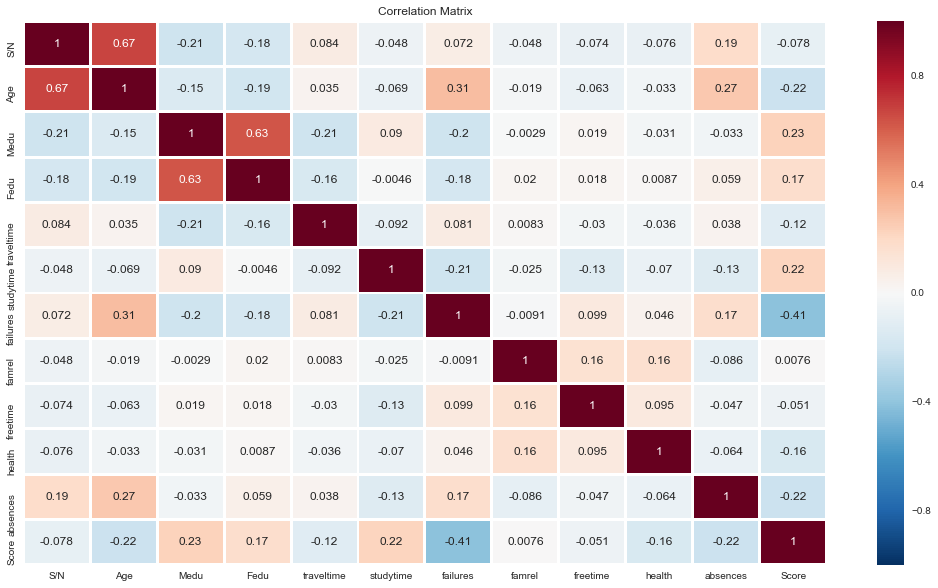

In [252]:
corr_file = read_file.copy()
corr_matrix = corr_file.corr()
#corr_matrix
f, ax = plt.subplots(figsize = (18,10))
sns.heatmap(corr_matrix, linewidths = 2.0, ax = ax, annot = True)
ax.set_title('Correlation Matrix')
plt.show()

In [253]:
from sklearn.model_selection import train_test_split
X_train, X_test,Y_train, Y_test = train_test_split(read_file,read_file['Score'], random_state = 20)

In [254]:
read_file.head()

,S/N,Age,Location,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,...,paid,activities,nursery,higher,internet,famrel,freetime,health,absences,Score
0,1,13,1,1,0,4,4,2,2,0,...,0,0,1,1,0,4,3,3,4,22
1,2,12,1,1,1,1,1,1,2,0,...,0,0,0,1,1,5,3,3,2,31
2,3,10,1,0,1,1,1,1,2,0,...,0,0,1,1,1,4,3,3,6,37
3,4,10,1,1,1,4,2,1,3,0,...,0,1,1,1,1,3,2,5,0,42
4,5,11,1,1,1,3,3,1,2,0,...,0,0,1,1,0,4,3,5,0,37


In [255]:
# using the ridge regression
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train, Y_train)
print ("training set score: %f" % ridge.score(X_train,Y_train))
print ('test set score: %f' % ridge.score(X_test, Y_test))

training set score: 1.000000
test set score: 1.000000


In [256]:
# logistic regression
from sklearn.linear_model import LogisticRegression
X_train, X_test, Y_train, Y_test = train_test_split(read_file, read_file['Score'], random_state = 20)
logisticregression = LogisticRegression().fit(X_train, Y_train)
print ("training set score: %f" % logisticregression.score(X_train, Y_train))
print ("test set score: %f" % logisticregression.score(X_test, Y_test))

training set score: 0.572016
test set score: 0.085366


In [257]:
test_file = pd.read_csv(r'C:\Users\ACER\Downloads\test(1).csv')
test_file.head()
#len(test_file.keys())

,S/N,Age,Location,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,...,famsup,paid,activities,nursery,higher,internet,famrel,freetime,health,absences
0,327,12,U,LE3,A,3,2,1,1,0,...,no,no,no,yes,yes,yes,4,4,3,18
1,328,13,R,LE3,T,1,1,2,4,0,...,yes,no,yes,yes,yes,no,5,2,3,2
2,329,13,U,GT3,T,1,1,2,2,0,...,no,no,yes,yes,yes,yes,5,4,4,0
3,330,12,U,GT3,T,2,2,1,2,0,...,yes,no,no,no,yes,yes,5,4,5,12
4,331,13,U,GT3,T,2,1,2,2,0,...,no,no,yes,yes,yes,yes,4,3,5,10


In [258]:
test_file = pd.read_csv(r'C:\Users\ACER\Downloads\test(1).csv')

read_file = test_file.copy()
# Gender
#read_file['Gender'][read_file['Gender']== 'F'] = 0
#read_file['Gender'][read_file['Gender'] == 'M'] = 1

# setting urban to 0 and rural to 2
read_file['Location'][read_file['Location']== 'U'] = 1
read_file['Location'][read_file['Location']== 'R'] = 0

# setting the famsize 
read_file['famsize'][read_file['famsize'] == 'LE3'] = 0 # less than 3
read_file['famsize'][read_file['famsize'] == 'GT3'] = 1 # greater than 3

# Pstatus
read_file['Pstatus'][read_file['Pstatus'] == 'T'] = 1 # living together
read_file['Pstatus'][read_file['Pstatus'] == 'A'] = 0 # living Apart

# paid
read_file['paid'][read_file['paid'] == 'yes'] = 1 # yes
read_file['paid'][read_file['paid'] == 'no'] = 0 # no

# activities
read_file['activities'][read_file['activities'] == 'yes'] = 1 # yes
read_file['activities'][read_file['activities'] == 'no'] = 0 # no

# nursery
read_file['nursery'][read_file['nursery'] == 'yes'] = 1 # yes
read_file['nursery'][read_file['nursery'] == 'no'] = 0 # no

# higher
read_file['higher'][read_file['higher'] == 'yes'] = 1 # yes
read_file['higher'][read_file['higher'] == 'no'] = 0 # no

# internet
read_file['internet'][read_file['internet'] == 'yes'] = 1 # yes
read_file['internet'][read_file['internet'] == 'no'] = 0 # no

# schoolsup
read_file['schoolsup'][read_file['schoolsup'] == 'yes'] = 1 # yes
read_file['schoolsup'][read_file['schoolsup'] == 'no'] = 0 # no

# famsup
read_file['famsup'][read_file['famsup'] == 'yes'] = 1 # yes
read_file['famsup'][read_file['famsup'] == 'no'] = 0 # no

read_file.head()

#lr.predict(test_file)

C:\Users\ACER\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\ACER\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\ACER\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
C:\Users\ACER\Anaconda3\lib\site-packages\ipykernel_la

,S/N,Age,Location,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,...,famsup,paid,activities,nursery,higher,internet,famrel,freetime,health,absences
0,327,12,1,0,0,3,2,1,1,0,...,0,0,0,1,1,1,4,4,3,18
1,328,13,0,0,1,1,1,2,4,0,...,1,0,1,1,1,0,5,2,3,2
2,329,13,1,1,1,1,1,2,2,0,...,0,0,1,1,1,1,5,4,4,0
3,330,12,1,1,1,2,2,1,2,0,...,1,0,0,0,1,1,5,4,5,12
4,331,13,1,1,1,2,1,2,2,0,...,0,0,1,1,1,1,4,3,5,10


In [259]:
test = read_file.copy()
test.keys()
test.shape

(323, 21)

In [260]:
lr = logisticregression.fit(X_train,X_test)
solution = lr.predict(test)

ValueError: bad input shape (82, 22)

In [192]:
read_data.keys()
print (len(read_data.keys()))

22


In [179]:
test.keys()

Index(['S/N', 'Age', 'Location', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid',
       'activities', 'nursery', 'higher', 'internet', 'famrel', 'freetime',
       'health', 'absences'],
      dtype='object')

In [193]:
final = test
def createDataFrame(data):
    final_dic = {}
    for i in range(len(data.keys())):
        final_dic[data.keys()[i]] = data[data.keys()[i]]
        final_dic['Score'] = []
    return final_dic

get_final = createDataFrame(final)
get_final.keys()

len(get_final.keys())

22

In [195]:
import pandas as pd
df = pd.DataFrame(get_final, columns = get_final.keys())

ValueError: array length 0 does not match index length 323

In [194]:
solution_to_score = ridge.predict(get_final)
print (solution_to_score)

TypeError: float() argument must be a string or a number, not 'dict'

In [182]:
final = test
def createDataFrame(data):
    final_dic = {}
    for i in range(len(data.keys())):
        final_dic[data.keys()[i]] = data[data.keys()[i]]
        final_dic['Score'] = solution_to_score
    return final_dic

get_final = createDataFrame(final)
get_final.keys()
#len(get_final.keys())

dict_keys(['S/N', 'Score', 'Age', 'Location', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'famrel', 'freetime', 'health', 'absences'])

In [183]:
df = pd.DataFrame(get_final, columns = get_final.keys())
#final_dataFrame = df.merge(df['S/N'], df['Scores'])
print (df['Score'])

ValueError: array length 195 does not match index length 323

In [136]:
df.to_csv(r'C:\Users\ACER\Desktop\submission.csv')

In [122]:
df.shape

(195, 24)

In [123]:
read_file.shape

(195, 23)

In [124]:
read_data.shape

(325, 23)